In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | aklavik
Processing Record 3 of Set 1 | nago
Processing Record 4 of Set 1 | nelson bay
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | sao filipe
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | cayenne
Processing Record 10 of Set 1 | birjand
Processing Record 11 of Set 1 | oussouye
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | lolua
City not found. Skipping...
Processing Record 14 of Set 1 | trud
Processing Record 15 of Set 1 | grindavik
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | saldanha
Processing Record 18 of Set 1 | ous
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 |

Processing Record 36 of Set 4 | fairview
Processing Record 37 of Set 4 | tateyama
Processing Record 38 of Set 4 | escanaba
Processing Record 39 of Set 4 | east london
Processing Record 40 of Set 4 | landerneau
Processing Record 41 of Set 4 | new norfolk
Processing Record 42 of Set 4 | cabedelo
Processing Record 43 of Set 4 | abaza
Processing Record 44 of Set 4 | gushikawa
Processing Record 45 of Set 4 | jacareacanga
Processing Record 46 of Set 4 | gillette
Processing Record 47 of Set 4 | shima
Processing Record 48 of Set 4 | avarua
Processing Record 49 of Set 4 | alta floresta
Processing Record 50 of Set 4 | barawe
City not found. Skipping...
Processing Record 1 of Set 5 | bethel
Processing Record 2 of Set 5 | loanda
Processing Record 3 of Set 5 | hualmay
Processing Record 4 of Set 5 | yinchuan
Processing Record 5 of Set 5 | tete
Processing Record 6 of Set 5 | saskylakh
Processing Record 7 of Set 5 | hobyo
Processing Record 8 of Set 5 | thai nguyen
Processing Record 9 of Set 5 | smithe

Processing Record 24 of Set 8 | dawson creek
Processing Record 25 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 26 of Set 8 | altay
Processing Record 27 of Set 8 | waipawa
Processing Record 28 of Set 8 | jalalpur
Processing Record 29 of Set 8 | tuatapere
Processing Record 30 of Set 8 | boa vista
Processing Record 31 of Set 8 | yantal
Processing Record 32 of Set 8 | hawera
Processing Record 33 of Set 8 | juncos
Processing Record 34 of Set 8 | beringovskiy
Processing Record 35 of Set 8 | sembe
Processing Record 36 of Set 8 | kichera
Processing Record 37 of Set 8 | merauke
Processing Record 38 of Set 8 | santa barbara
Processing Record 39 of Set 8 | tomatlan
Processing Record 40 of Set 8 | asayita
City not found. Skipping...
Processing Record 41 of Set 8 | saint-georges
Processing Record 42 of Set 8 | banda aceh
Processing Record 43 of Set 8 | sodertalje
City not found. Skipping...
Processing Record 44 of Set 8 | torbay
Processing Record 45 of Set 8 | baillif
Proc

Processing Record 10 of Set 12 | jiwani
Processing Record 11 of Set 12 | chernyshevskiy
Processing Record 12 of Set 12 | karatau
Processing Record 13 of Set 12 | jiayuguan
Processing Record 14 of Set 12 | verkhniy avzyan
Processing Record 15 of Set 12 | szczytno
Processing Record 16 of Set 12 | harper
Processing Record 17 of Set 12 | khandbari
Processing Record 18 of Set 12 | gat
Processing Record 19 of Set 12 | tazovskiy
Processing Record 20 of Set 12 | launceston
Processing Record 21 of Set 12 | jalu
Processing Record 22 of Set 12 | mayo
Processing Record 23 of Set 12 | angoche
Processing Record 24 of Set 12 | maliq
Processing Record 25 of Set 12 | akyab
Processing Record 26 of Set 12 | jumla
Processing Record 27 of Set 12 | narrabri
Processing Record 28 of Set 12 | daman
Processing Record 29 of Set 12 | bobrovytsya
Processing Record 30 of Set 12 | kaihua
Processing Record 31 of Set 12 | port-cartier
Processing Record 32 of Set 12 | lensk
Processing Record 33 of Set 12 | chegdomyn
Pr

In [13]:
len(city_data)

565

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,50.29,93,0,3.44,ZA,2021-08-15 01:46:15
1,Aklavik,68.2191,-135.0107,63.43,44,66,11.59,CA,2021-08-15 01:46:16
2,Nago,26.5881,127.9761,86.16,75,47,9.71,JP,2021-08-15 01:46:16
3,Nelson Bay,-32.7167,152.1500,70.29,62,0,1.99,AU,2021-08-15 01:46:16
4,Atuona,-9.8000,-139.0333,78.46,80,22,20.40,PF,2021-08-15 01:46:17
5,Sao Filipe,14.8961,-24.4956,74.91,79,94,8.34,CV,2021-08-15 01:46:17
6,Ushuaia,-54.8000,-68.3000,33.46,75,0,3.44,AR,2021-08-15 01:46:18
7,Cayenne,4.9333,-52.3333,81.09,85,0,1.01,GF,2021-08-15 01:46:18
8,Birjand,32.8663,59.2211,63.07,25,0,6.91,IR,2021-08-15 01:46:19
9,Oussouye,12.4850,-16.5469,78.98,86,100,7.38,SN,2021-08-15 01:46:19


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2021-08-15 01:46:15,-34.5322,20.0403,50.29,93,0,3.44
1,Aklavik,CA,2021-08-15 01:46:16,68.2191,-135.0107,63.43,44,66,11.59
2,Nago,JP,2021-08-15 01:46:16,26.5881,127.9761,86.16,75,47,9.71
3,Nelson Bay,AU,2021-08-15 01:46:16,-32.7167,152.1500,70.29,62,0,1.99
4,Atuona,PF,2021-08-15 01:46:17,-9.8000,-139.0333,78.46,80,22,20.40
5,Sao Filipe,CV,2021-08-15 01:46:17,14.8961,-24.4956,74.91,79,94,8.34
6,Ushuaia,AR,2021-08-15 01:46:18,-54.8000,-68.3000,33.46,75,0,3.44
7,Cayenne,GF,2021-08-15 01:46:18,4.9333,-52.3333,81.09,85,0,1.01
8,Birjand,IR,2021-08-15 01:46:19,32.8663,59.2211,63.07,25,0,6.91
9,Oussouye,SN,2021-08-15 01:46:19,12.4850,-16.5469,78.98,86,100,7.38


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

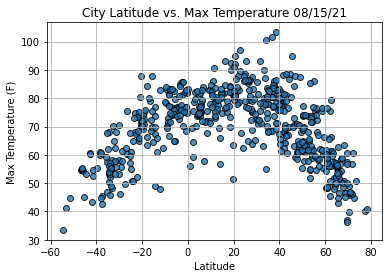

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

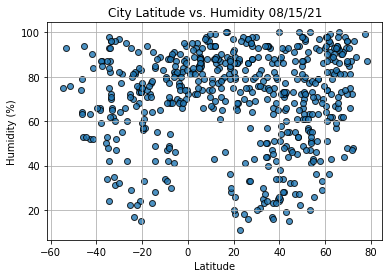

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

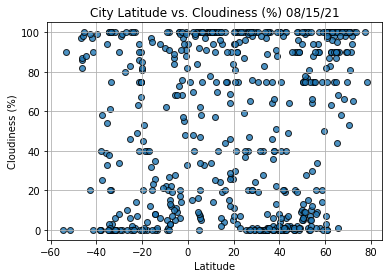

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

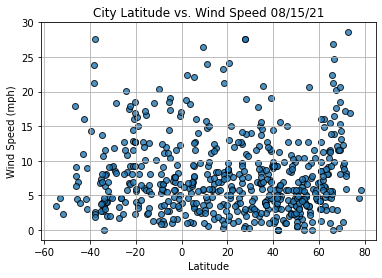

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()